In [1]:
#ANADEM – Modelo Digital de Terreno para a América do Sul
#O ANADEM é um modelo digital do terreno (MDT) com remoção de viés causado pela vegetação no modelo digital de elevação (MDE) Copernicus GLO-30. 
#Com resolução espacial de 30 metros, e disponível para toda a América do Sul, o produto foi desenvolvido pelo Instituto de Pesquisas Hidráulicas (IPH) da UFRGS 
#em parceria com a Agência Nacional de Águas e Saneamento Básico (ANA) através de termo de cooperação.
#A nota técnica conjunta apresenta os principais aspectos metodológicos de elaboração do ANADEM e resultados preliminares de validação do MDT. 
#O detalhamento completo com a metodologia do ANADEM e resultados de validação serão apresentados no relatório técnico final do projeto e em artigo científico a ser submetido futuramente.
#Acesse a nota técnica conjunta: https://chasquebox.ufrgs.br/public/875672
import datetime
import time
import ee
#Atualiza base do Geemap import geemap
#geemap.update_package()
#import geemap.foliumap as geemap
import json
import pandas as pd
import numpy as np


Selecione uma região de interesse (roi): Limeira
Use o nome que esta na base do IBGE, que deverá ser salva em Assets do seu projeto no repositório do Google Earth Engine (GEE), portanto: https://code.earthengine.google.com/

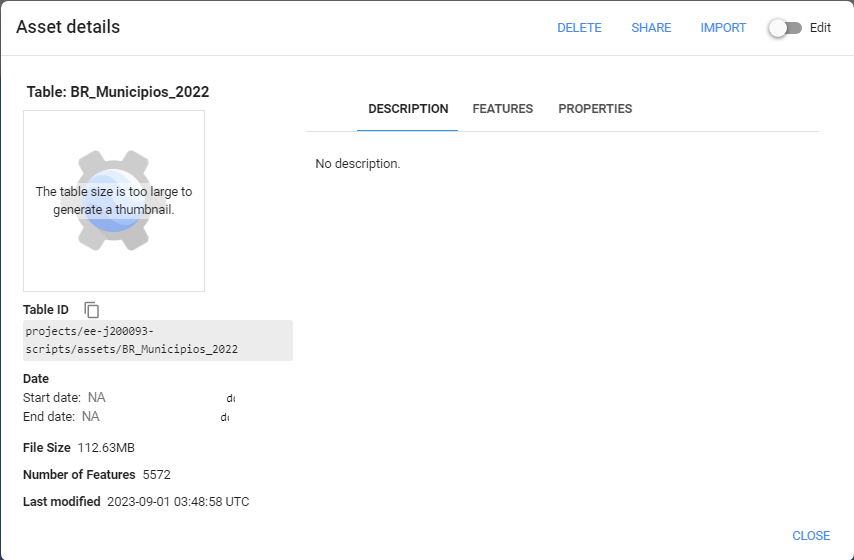

Aqui é o destino do projeto: projects/ee-j200093-scripts/assets/BR_Municipios_2022

Corresponde a base do IBGE com Shapefiles de 2022, disponícel em:
https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2022/Brasil/BR/BR_Municipios_2022.zip


In [2]:
#Autenticação no Google Earth Engine
#ee.Authenticate()

In [3]:
#Inicialização do Google Earth Engine
ee.Initialize()

In [4]:
#O ANADEM é um modelo digital do terreno (MDT) com remoção de viés causado pela vegetação no modelo 
#digital de elevação (MDE) Copernicus GLO-30. Com resolução espacial de 30 metros, e disponível 
#para toda a América do Sul, o produto foi desenvolvido pelo Instituto de Pesquisas Hidráulicas (IPH) 
#da UFRGS em parceria com a Agência Nacional de Águas
#e Saneamento Básico (ANA) através de termo de cooperação. Link: https://www.ufrgs.br/hge/anadem-modelo-digital-de-terreno-mdt/

anadem = ee.Image("projects/et-brasil/assets/anadem/v018")

In [5]:
while True:
    # Solicitação de entrada do usuário para o nome da cidade
    nome_cidade = input("Digite o nome da cidade: ")

    # Construir a expressão da região de interesse (ROI) com o nome da cidade
    regiaoInteresse = ee.FeatureCollection('projects/ee-j200093-scripts/assets/BR_Municipios_2022').filter(ee.Filter.eq('NM_MUN', nome_cidade))

    # Verificar se a FeatureCollection está vazia
    if regiaoInteresse.size().getInfo() == 0:
        # Exibir mensagem de erro e continuar o loop
        display(f"Erro: Nenhum município encontrado com o nome '{nome_cidade}'. Verifique a ortografia ou escolha outra cidade.")
    else:
        # Saia do loop se o nome da cidade estiver correto
        break

# Restante do código que utiliza a variável roi
display(f"Cidade '{nome_cidade}' encontrada. Continuando com o restante do código...")
# Imprima informações sobre a geometria
display("Tipo de Geometria:", type(regiaoInteresse))
display("Detalhes da Geometria:", regiaoInteresse.getInfo())
# Perceba que os valores que estão dentro de ee.filter.eq devem ser iguais a base do Shapfile
#regiaoInteresse = ee.FeatureCollection('projects/SEUPROJETO_GEE/assets/BR_Municipios_2022').filter(ee.Filter.eq('NM_MUN', 'Limeira'))
# Imprima informações sobre a geometria
#display("Tipo de Geometria:", type(regiaoInteresse))
#display("Detalhes da Geometria:", regiaoInteresse.getInfo())


"Cidade 'Limeira' encontrada. Continuando com o restante do código..."

'Tipo de Geometria:'

ee.featurecollection.FeatureCollection

'Detalhes da Geometria:'

{'type': 'FeatureCollection',
 'columns': {'AREA_KM2': 'Float',
  'CD_MUN': 'String',
  'NM_MUN': 'String',
  'SIGLA_UF': 'String',
  'system:index': 'String'},
 'version': 1693540138313653,
 'id': 'projects/ee-j200093-scripts/assets/BR_Municipios_2022',
 'properties': {'system:asset_size': 118103237},
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-47.30220197937984, -22.444965429837882],
      [-47.30468563292979, -22.446490439671734],
      [-47.30634890379163, -22.447850474694047],
      [-47.30655399077146, -22.448140324211085],
      [-47.306776983685396, -22.4490499619853],
      [-47.307075776300536, -22.449674229628616],
      [-47.30855171032007, -22.451052086785985],
      [-47.30893966943788, -22.45184135787023],
      [-47.30950594575964, -22.452416555588318],
      [-47.309746708335375, -22.452831296771695],
      [-47.31045572220829, -22.453303908118766],
      [-47.31050481560489, -22.453834598587004],
      [-47.3109105467062

In [6]:
#Seleciona a regiao de interesse
#Em .updateMask(anadem.neq(0) cria uma máscara booleana onde os pixels que são diferentes de zero são marcados como verdadeiros
anadem = anadem.updateMask(anadem.neq(0))\
    .clip(regiaoInteresse)
display("Tipo de Geometria:", type(anadem))
display("Detalhes da Geometria:", anadem.getInfo())

'Tipo de Geometria:'

ee.image.Image

'Detalhes da Geometria:'

{'type': 'Image',
 'bands': [{'id': 'min1',
   'data_type': {'type': 'PixelType', 'precision': 'double'},
   'dimensions': [183780, 263091],
   'crs': 'EPSG:4326',
   'crs_transform': [0.0002694945852358564,
    0,
    -82.62811781165453,
    0,
    -0.0002694945852358564,
    14.245753270152608]}],
 'version': 1695053624353519,
 'id': 'projects/et-brasil/assets/anadem/v018',
 'properties': {'system:asset_size': 152441799915}}

In [7]:
#Parâmetros de visualização
import geemap
Map = geemap.Map()
Map = geemap.Map(height=900)
Map.add_basemap('HYBRID')
#Transições de Cores:
#https://color.adobe.com/pt/create/color-wheel
#Vis params use valores min e max de elevação conforme perfil da sua regiao.
vis_params = {
    'min': 500,
    'max': 850,
    'palette': ['0E8E1C', '14FA84', '18FBE8', '1D44FA', '221CFB', '821BFB','F91DC4','FA1828','FA5219','FA9C1D','FABC18','FAE19B','F8ECDD','E9E5F6'],
    'opacity': 0.65 # escolha um valor entre 0 e 1 para a opacidade do layer de visualização
}
Map.addLayer(anadem, vis_params, 'ANADEM')

In [8]:
colors = vis_params['palette']
vmin = vis_params['min']
vmax = vis_params['max']

Map.add_colorbar_branca(colors=colors, vmin=vmin, vmax=vmax, layer_name="Altitude (m)")

In [9]:
Map.centerObject(regiaoInteresse, zoom=12)
Map

Map(center=[-22.598497085154953, -47.36368474411129], controls=(WidgetControl(options=['position', 'transparen…

In [10]:
#Exporta a imagem para o Google Drive
#Export.image.toDrive({
#  image: anadem,
#  description: 'SuaRegiao_ANADEM',
#  scale: 30,
#  region: regiaoInteresse,
#  maxPixels: 1e13
#});
